In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from class_simulationhelper import SimulationHelpers
from data_generation import gen_data
from lstm_autoencoder import DataGeneration, LSTM_Model_Base, reconstruction
from model_exec import get_outliers, lstm_run, reconstruction, temporalize

# Prepare Dataset

In [2]:
featured_credit = pd.read_csv(r'data\featured_credit.csv', index_col="trans_date")
credit = featured_credit.loc[:,[col for col in featured_credit.columns if "_" not in col]]
d1 = featured_credit.loc[:,[col for col in featured_credit.columns if col.endswith("_d1")]]

# Select n companies with no zero observations and highest variances. 
credit_nozero = credit.loc[:,credit.apply(lambda x : (x==0).sum() == 0)]
# np.random.seed(42)
# n_companies = 6
np.random.seed(25)

n_companies = 8
companies = np.random.choice(credit_nozero.apply(lambda x: (x - x.mean())/x.std()).columns, n_companies, replace=False).tolist()
np.random.seed(None)

def standard_scale(x: pd.Series):
    return (x - x.mean())/x.std()

def has_substr_in_list(s:str, l:list):
    return not all(x not in s for x in l)

features = featured_credit.loc[:,[col for col in featured_credit if ("_" in col) and (has_substr_in_list(col, companies))]]
features = features.apply(standard_scale)
features.shape


(2503, 24)

# Run LSTM for univariate time series

In [3]:
seq_size = 5
company_ind = 1
n_feature = 1

data = features.values[:,company_ind]
data = np.expand_dims(data,1)
test_size = 0.4
partition_size = int(len(data) * (1 - test_size))

data_train = data[0:partition_size]
data_test = data[partition_size:]

data_train_seq = temporalize(data_train, seq_size)
data_test_seq = temporalize(data_test, seq_size)

lstm_pred, lstm_outliers, history = lstm_run(
    LSTM_Model_Base(
        seq_size, 
        n_feature, 
        [   128,
            64,
            64,
            128
        ], 
        mid_activation=tf.nn.tanh
    ),
    data_train_seq,
    data_test_seq,
    batch_size=512,
    epoch=300,
    metric="bb",
    early_stopping=False,
    cross_feature_check=False
)
# dense_pred, dense_outliers = dense_run(data_train, data_test, n_feature, batch_size = 100)

print(f"Data test shape {data_test.shape}")
print(f"lstm_pred shape {lstm_pred.shape}")
# print(f"dense_pred shape {dense_pred.shape}")

Epoch 1/300
3/3 [==============================] - 8s 11ms/step - loss: 1.1324
Epoch 2/300
3/3 [==============================] - 0s 12ms/step - loss: 1.1292
Epoch 3/300
3/3 [==============================] - 0s 12ms/step - loss: 1.1237
Epoch 4/300
3/3 [==============================] - 0s 12ms/step - loss: 1.1131
Epoch 5/300
3/3 [==============================] - 0s 11ms/step - loss: 1.0952
Epoch 6/300
3/3 [==============================] - 0s 11ms/step - loss: 1.0671
Epoch 7/300
3/3 [==============================] - 0s 11ms/step - loss: 1.0354
Epoch 8/300
3/3 [==============================] - 0s 11ms/step - loss: 1.0245
Epoch 9/300
3/3 [==============================] - 0s 10ms/step - loss: 1.0219
Epoch 10/300
3/3 [==============================] - 0s 10ms/step - loss: 1.0133
Epoch 11/300
3/3 [==============================] - 0s 10ms/step - loss: 1.0091
Epoch 12/300
3/3 [==============================] - 0s 10ms/step - loss: 1.0036
Epoch 13/300
3/3 [==============================]

3/3 [==============================] - 0s 11ms/step - loss: 0.1642
Epoch 104/300
3/3 [==============================] - 0s 10ms/step - loss: 0.1609
Epoch 105/300
3/3 [==============================] - 0s 10ms/step - loss: 0.1631
Epoch 106/300
3/3 [==============================] - 0s 11ms/step - loss: 0.1599
Epoch 107/300
3/3 [==============================] - 0s 11ms/step - loss: 0.1561
Epoch 108/300
3/3 [==============================] - 0s 11ms/step - loss: 0.1553
Epoch 109/300
3/3 [==============================] - 0s 11ms/step - loss: 0.1538
Epoch 110/300
3/3 [==============================] - 0s 11ms/step - loss: 0.1528
Epoch 111/300
3/3 [==============================] - 0s 11ms/step - loss: 0.1516
Epoch 112/300
3/3 [==============================] - 0s 11ms/step - loss: 0.1486
Epoch 113/300
3/3 [==============================] - 0s 11ms/step - loss: 0.1489
Epoch 114/300
3/3 [==============================] - 0s 10ms/step - loss: 0.1477
Epoch 115/300
3/3 [=======================

3/3 [==============================] - 0s 11ms/step - loss: 0.0891
Epoch 205/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0892
Epoch 206/300
3/3 [==============================] - 0s 10ms/step - loss: 0.0894
Epoch 207/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0878
Epoch 208/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0880
Epoch 209/300
3/3 [==============================] - 0s 10ms/step - loss: 0.0891
Epoch 210/300
3/3 [==============================] - 0s 10ms/step - loss: 0.0877
Epoch 211/300
3/3 [==============================] - 0s 10ms/step - loss: 0.0862
Epoch 212/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0862
Epoch 213/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0854
Epoch 214/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0851
Epoch 215/300
3/3 [==============================] - 0s 11ms/step - loss: 0.0861
Epoch 216/300
3/3 [=======================

INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


32/32 [==============================] - 1s 8ms/step
Data test shape (1002, 1)
lstm_pred shape (1002, 1)


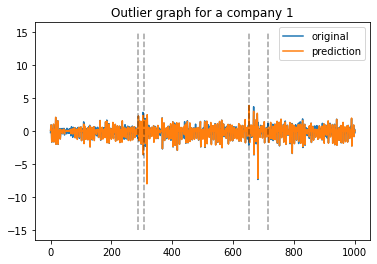

(1002, 1)

In [4]:
#plots for univariate
plt.plot(range(1002), data_test, label = "original")
plt.plot(range(1002), lstm_pred, label = "prediction")

distances = np.square(lstm_pred-data_test)
outliers  = np.argsort(distances.reshape(-1))[-4:]


for o in outliers:
    plt.plot([outliers]*100, np.linspace(-15,15,100), 'k--', alpha = 0.1)

plt.legend()
plt.title("Outlier graph for a company 1")
plt.show()

lstm_pred.shape

# Run LSTM for multivariate time series

In [5]:
seq_size = 5
n_feature = features.shape[1]

data = features.values
test_size = 0.4
partition_size = int(len(data) * (1 - test_size))

data_train = data[0:partition_size]
data_test = data[partition_size:]

data_train_seq = temporalize(data_train, seq_size)
data_test_seq = temporalize(data_test, seq_size)

lstm_pred, lstm_outliers, history = lstm_run(
    LSTM_Model_Base(
        seq_size, 
        n_feature, 
        [   128,
            64,
            64,
            128
        ], 
        mid_activation=tf.nn.tanh
    ),
    data_train_seq,
    data_test_seq,
    batch_size=512,
    epoch=500,
    metric="bb",
    early_stopping=False,
    cross_feature_check=True
)
# dense_pred, dense_outliers = dense_run(data_train, data_test, n_feature, batch_size = 100)

print(f"Data test shape {data_test.shape}")
print(f"lstm_pred shape {lstm_pred.shape}")
# print(f"dense_pred shape {dense_pred.shape}")

Epoch 1/500
3/3 [==============================] - 4s 30ms/step - loss: 1.0155
Epoch 2/500
3/3 [==============================] - 0s 28ms/step - loss: 1.0145
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 1.0131
Epoch 4/500
3/3 [==============================] - 0s 19ms/step - loss: 1.0107
Epoch 5/500
3/3 [==============================] - 0s 18ms/step - loss: 1.0071
Epoch 6/500
3/3 [==============================] - 0s 18ms/step - loss: 1.0020
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 0.9974
Epoch 8/500
3/3 [==============================] - 0s 17ms/step - loss: 0.9936
Epoch 9/500
3/3 [==============================] - 0s 17ms/step - loss: 0.9891
Epoch 10/500
3/3 [==============================] - 0s 14ms/step - loss: 0.9845
Epoch 11/500
3/3 [==============================] - 0s 12ms/step - loss: 0.9794
Epoch 12/500
3/3 [==============================] - 0s 12ms/step - loss: 0.9742
Epoch 13/500
3/3 [==============================]

3/3 [==============================] - 0s 12ms/step - loss: 0.3961
Epoch 104/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3955
Epoch 105/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3920
Epoch 106/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3904
Epoch 107/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3872
Epoch 108/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3858
Epoch 109/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3835
Epoch 110/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3813
Epoch 111/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3783
Epoch 112/500
3/3 [==============================] - 0s 12ms/step - loss: 0.3766
Epoch 113/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3744
Epoch 114/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3736
Epoch 115/500
3/3 [=======================

3/3 [==============================] - 0s 12ms/step - loss: 0.2592
Epoch 205/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2584
Epoch 206/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2582
Epoch 207/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2570
Epoch 208/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2558
Epoch 209/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2547
Epoch 210/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2538
Epoch 211/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2527
Epoch 212/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2520
Epoch 213/500
3/3 [==============================] - 0s 12ms/step - loss: 0.2514
Epoch 214/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2500
Epoch 215/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2497
Epoch 216/500
3/3 [=======================

3/3 [==============================] - 0s 11ms/step - loss: 0.1894
Epoch 306/500
3/3 [==============================] - 0s 12ms/step - loss: 0.1889
Epoch 307/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1889
Epoch 308/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1882
Epoch 309/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1875
Epoch 310/500
3/3 [==============================] - 0s 12ms/step - loss: 0.1866
Epoch 311/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1865
Epoch 312/500
3/3 [==============================] - 0s 12ms/step - loss: 0.1853
Epoch 313/500
3/3 [==============================] - 0s 12ms/step - loss: 0.1849
Epoch 314/500
3/3 [==============================] - 0s 12ms/step - loss: 0.1843
Epoch 315/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1843
Epoch 316/500
3/3 [==============================] - 0s 12ms/step - loss: 0.1836
Epoch 317/500
3/3 [=======================

3/3 [==============================] - 0s 10ms/step - loss: 0.1474
Epoch 407/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1471
Epoch 408/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1467
Epoch 409/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1462
Epoch 410/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1458
Epoch 411/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1455
Epoch 412/500
3/3 [==============================] - 0s 10ms/step - loss: 0.1451
Epoch 413/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1448
Epoch 414/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1444
Epoch 415/500
3/3 [==============================] - 0s 12ms/step - loss: 0.1445
Epoch 416/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1438
Epoch 417/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1435
Epoch 418/500
3/3 [=======================

INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets


32/32 [==============================] - 1s 8ms/step
Data test shape (1002, 24)
lstm_pred shape (1002, 24)


C:\Users\raymo\Documents\GitHub\deep-learning-wellington-od\model_exec.py:104: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  check_idx =  np.array([
C:\Users\raymo\Documents\GitHub\deep-learning-wellington-od\model_exec.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(indices)


In [6]:
lstm_outliers[2].shape

(7,)

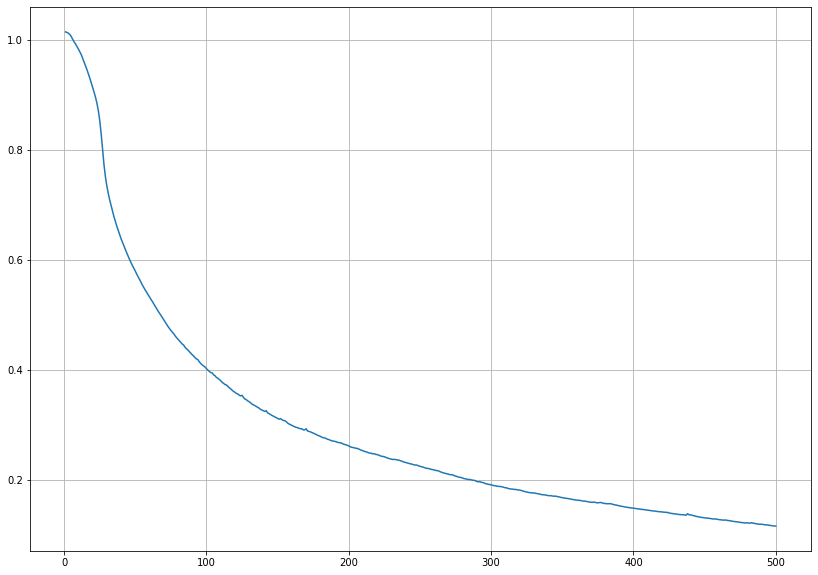

In [7]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
fig, ax = plt.subplots(1, 1, figsize = [14, 10])
ax.plot(np.arange(1, 501), loss)
ax.grid()

# Plotting

Text(0.5, 0.98, 'Sample Run with pairwise_distance')

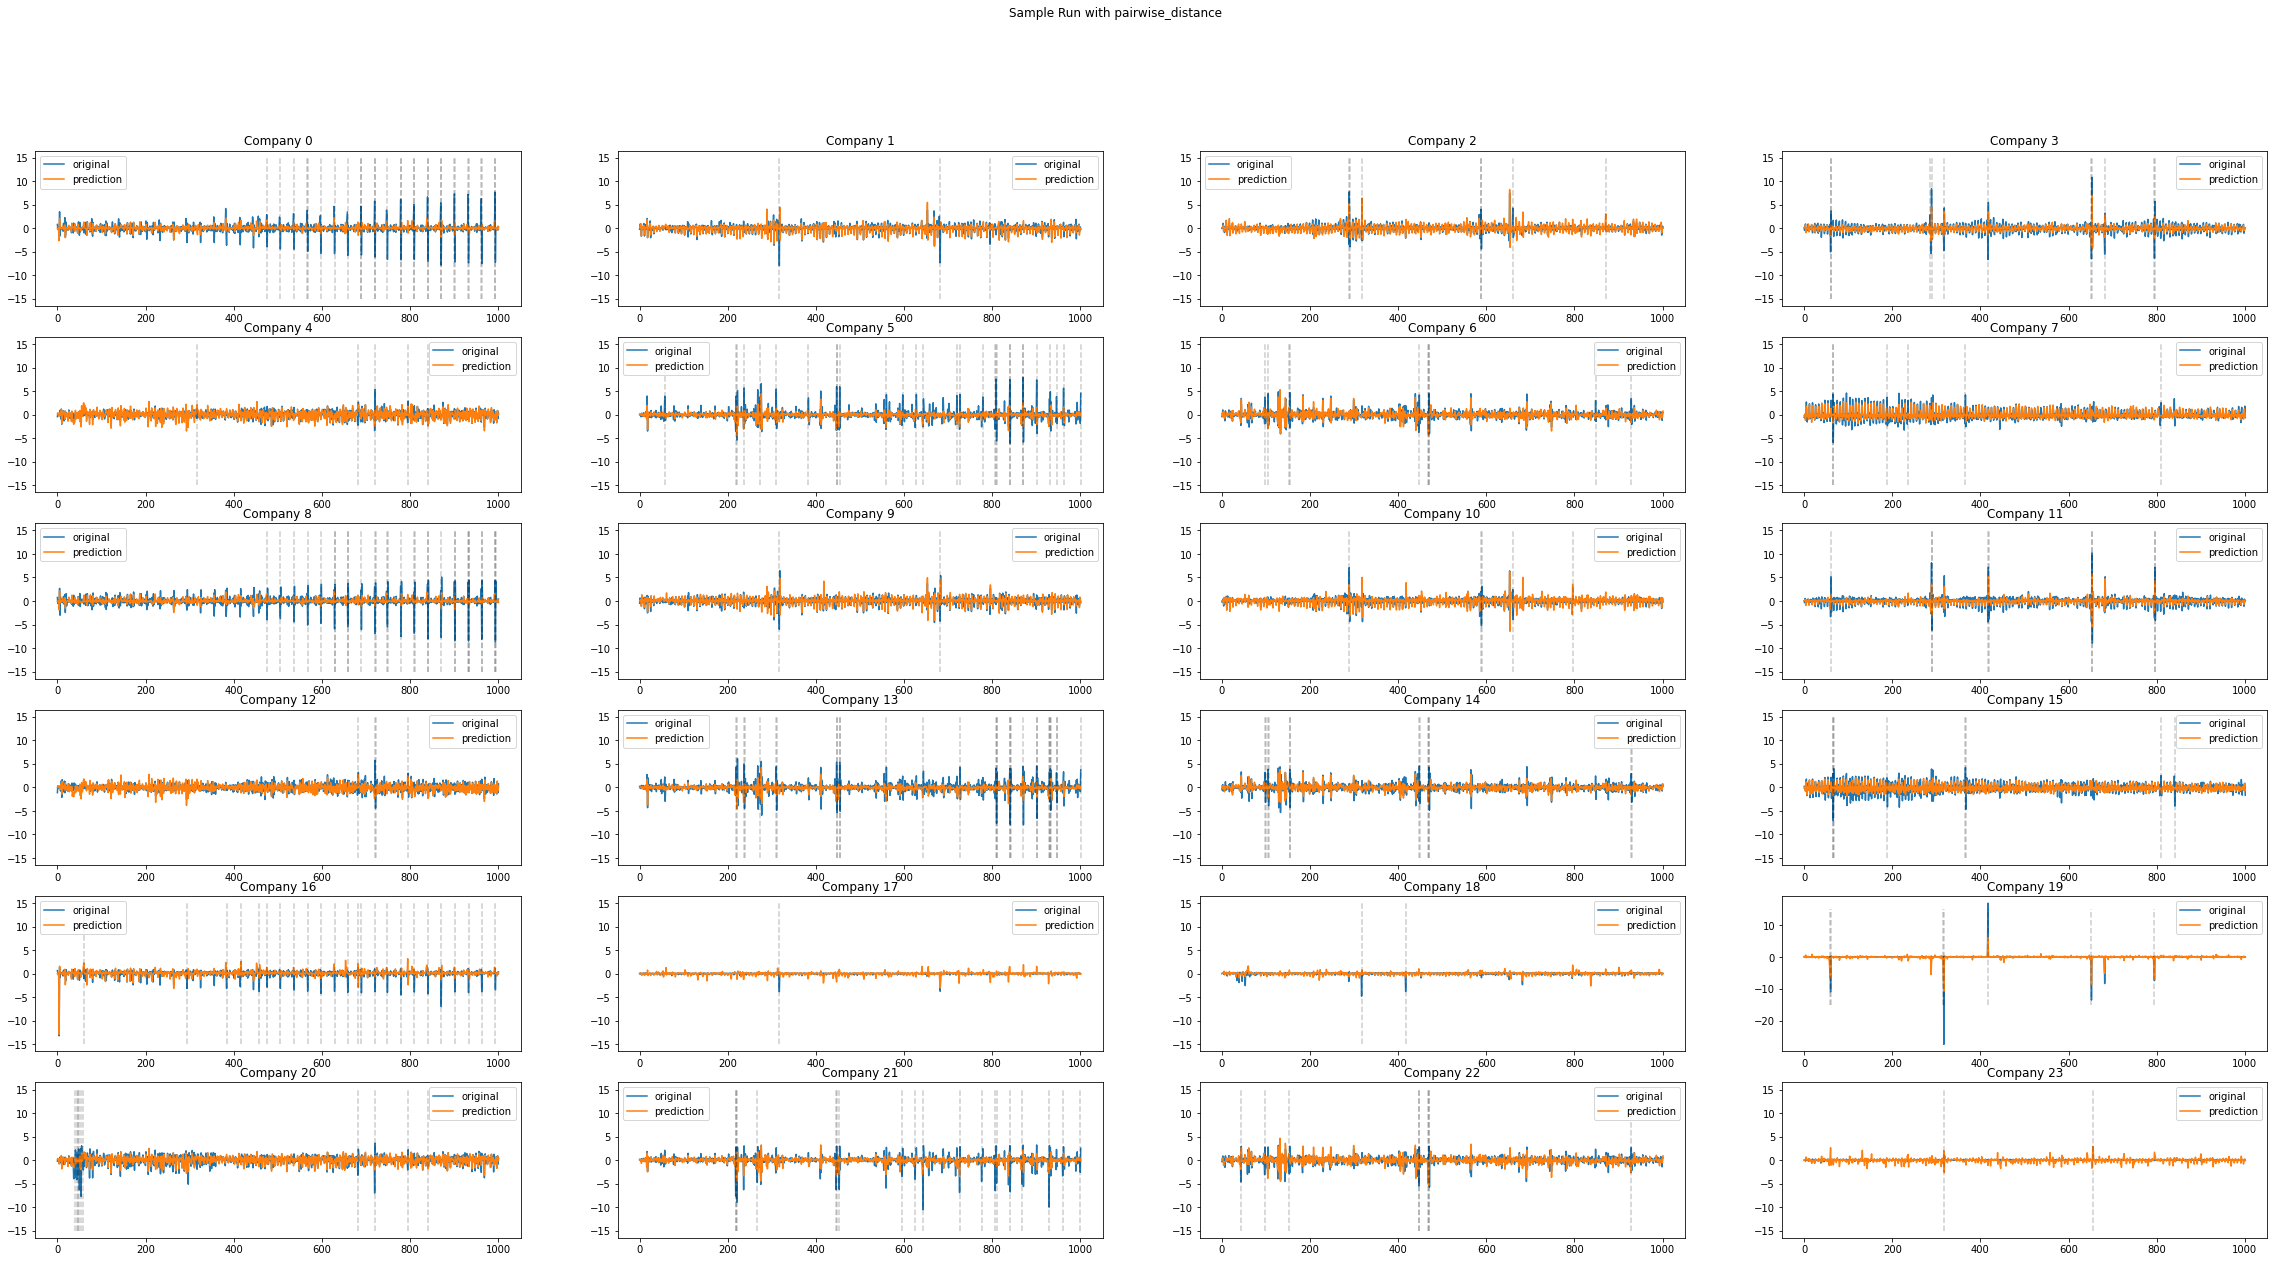

In [11]:
rows = 6
cols = 4

figure, ax = plt.subplots(rows, cols, figsize=(40, 20))

for i in range(rows*cols):
    ax[i//cols][i % cols].plot(range(1002), data_test[:,i], label = "original")
    ax[i//cols][i % cols].plot(range(1002), lstm_pred[:,i], label = "prediction")
#   ax[i//cols][i % cols].grid()
    for o in lstm_outliers[i]:
        ax[i//cols][i % cols].plot([o]*100, np.linspace(-15,15,100), 'k--', alpha = 0.2)
    ax[i//cols][i % cols].set_title(f"Company {i}")
    ax[i//cols][i % cols].legend()
figure.suptitle("All Runs with pairwise_distance")    
    


Text(0.5, 0.98, 'All Runs with pairwise_distance_no_broadcast')

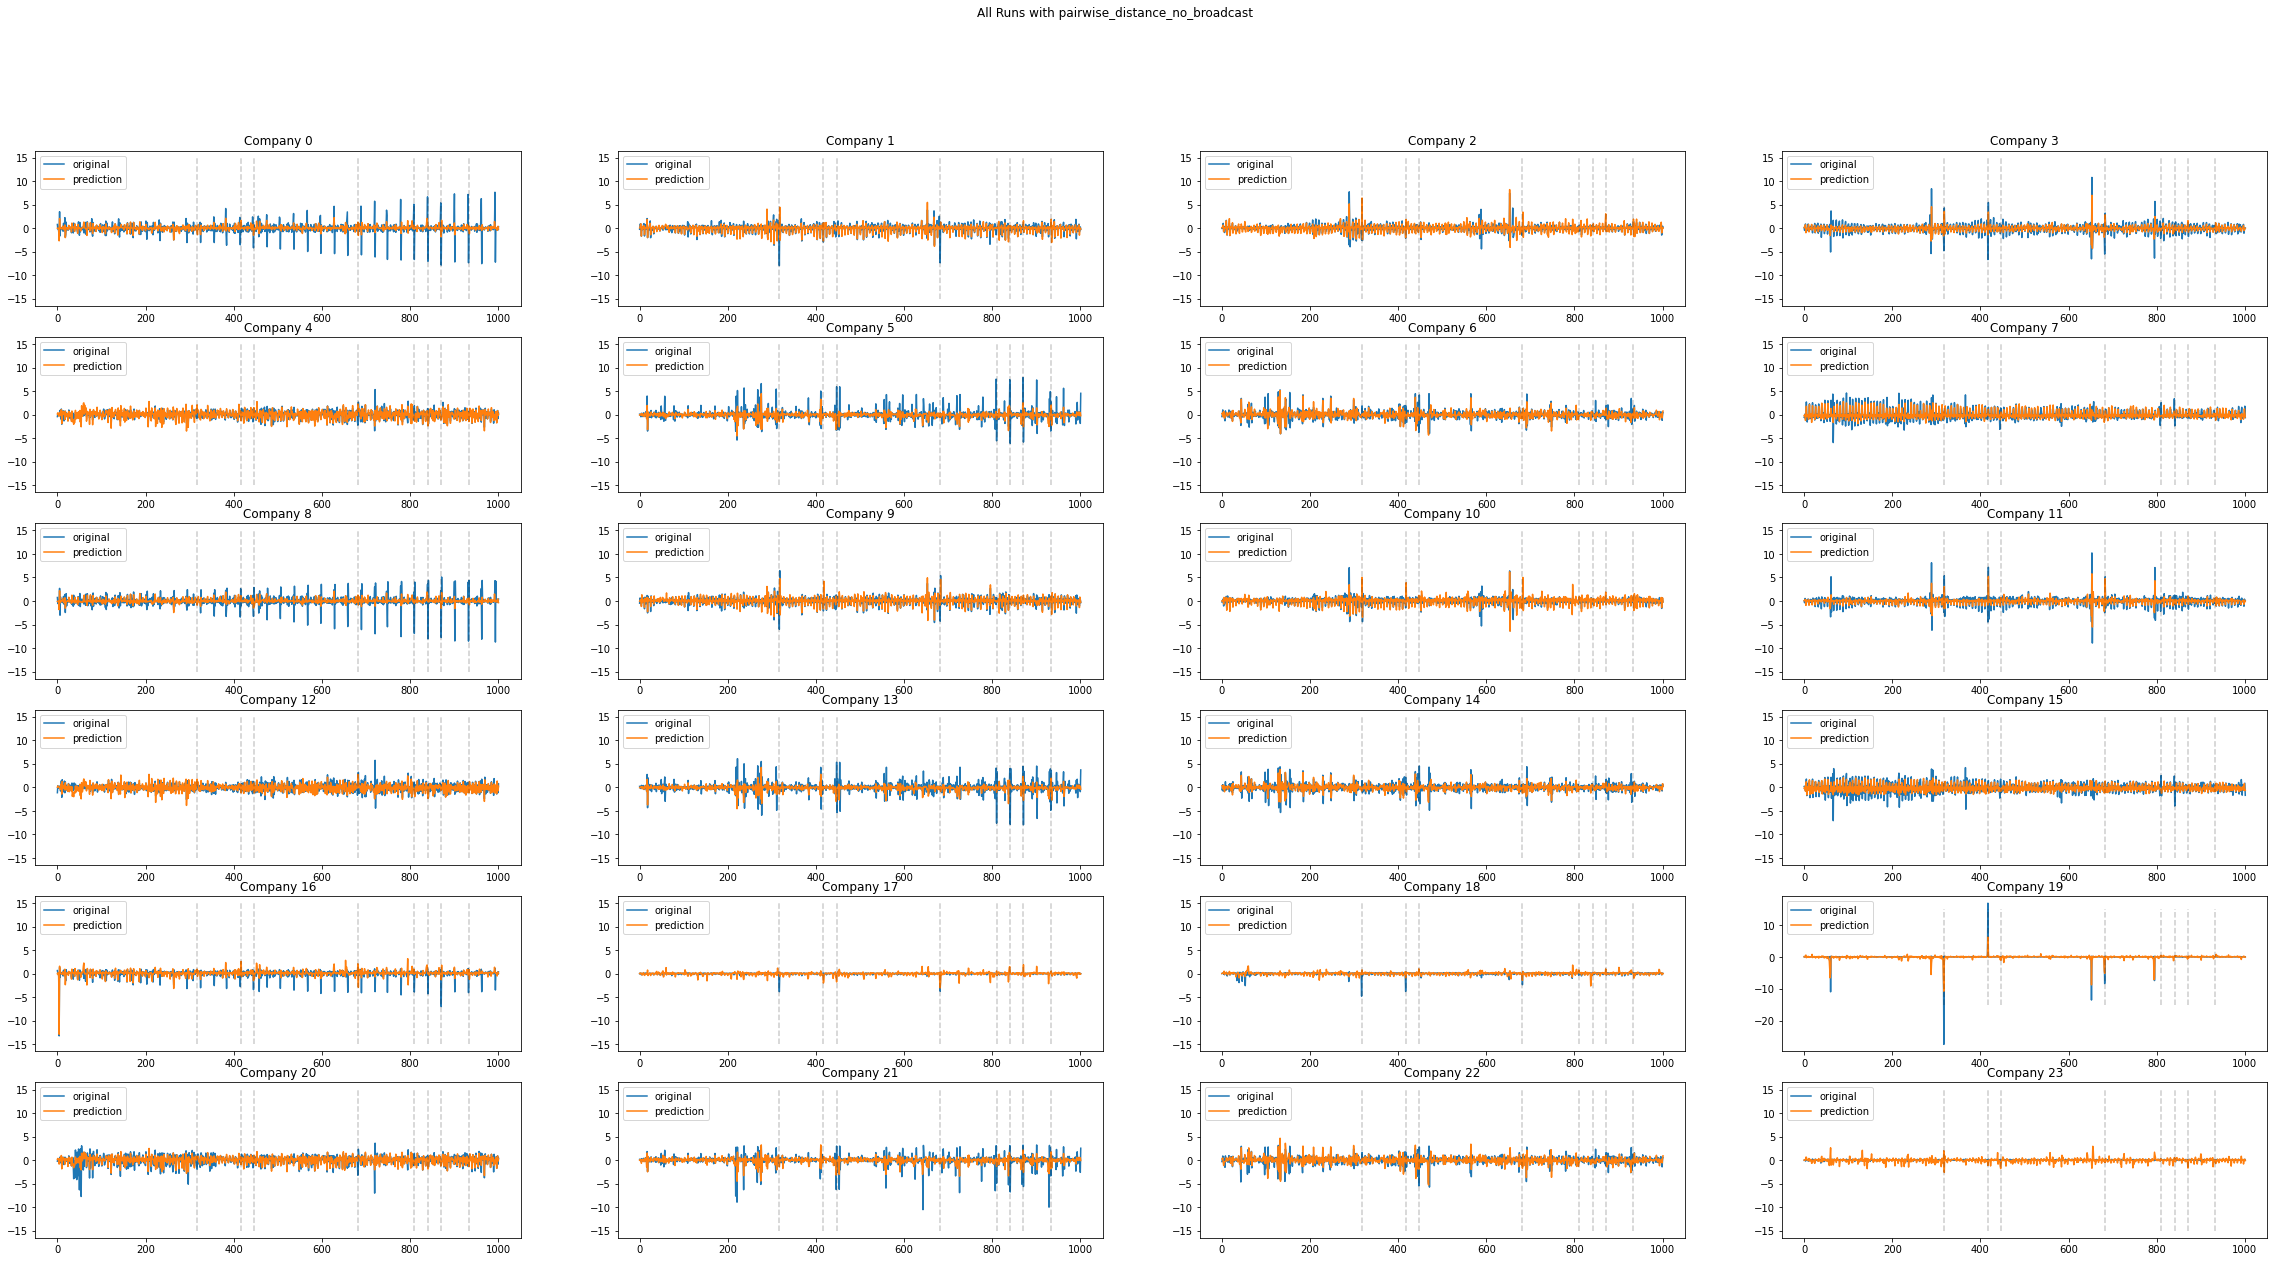

In [13]:
distances = np.mean(np.square(lstm_pred-data_test),axis=1)
lstm_outliers  = np.argsort(distances.reshape(-1))[-8:]
lstm_outliers

rows = 6
cols = 4

figure, ax = plt.subplots(rows, cols, figsize=(40, 20))

for i in range(rows*cols):
    ax[i//cols][i % cols].plot(range(1002), data_test[:,i], label = "original")
    ax[i//cols][i % cols].plot(range(1002), lstm_pred[:,i], label = "prediction")
#   ax[i//cols][i % cols].grid()
    for o in lstm_outliers:
        ax[i//cols][i % cols].plot([o]*100, np.linspace(-15,15,100), 'k--', alpha = 0.2)
    ax[i//cols][i % cols].set_title(f"Company {i}")
    ax[i//cols][i % cols].legend()
figure.suptitle("All Runs with pairwise_distance_no_broadcast")  